In [37]:
%pylab inline
from pyspark.sql import SQLContext
from pyspark.sql.types import *  
import seaborn
import matplotlib.pyplot as plt
import IPython
import numpy

Populating the interactive namespace from numpy and matplotlib


In [38]:
sqlContext = SQLContext(sc)
dataFile = sc.textFile("/user/root/analytic_out/part-r-00000")
header = dataFile.first()
fields = [StructField(field_name, StringType(), True) for field_name in header.split('|')]
fields[0].dataType = StringType()
fields[1].dataType = FloatType()
fields[2].dataType = FloatType()
fields[3].dataType = FloatType()
fields[4].dataType = FloatType()
fields[5].dataType = FloatType()
fields[6].dataType = FloatType()
fields[7].dataType = FloatType()
fields[8].dataType = FloatType()
fields[9].dataType = FloatType()
schema = StructType(fields)
dataHeader = dataFile.filter(lambda l: "id" in l)
dataHeader.collect()
dataNoHeader = dataFile.subtract(dataHeader)
data_temp = dataNoHeader.map(lambda k: k.split("|")).map(lambda p: ( p[0], float(p[1]), float(p[2]), float(p[3]), float(p[4]), float(p[5]), float(p[6]), float(p[7]), float(p[8]), float(p[9]) )
)
data_df = sqlContext.createDataFrame(data_temp, schema)
data_df.printSchema()
data_df.registerTempTable("data")

root
 |-- id	YEAR: string (nullable = true)
 |-- NETWORK: float (nullable = true)
 |-- LABOREXP: float (nullable = true)
 |-- STAFF: float (nullable = true)
 |-- ELECEXP: float (nullable = true)
 |-- KWH: float (nullable = true)
 |-- TOTCOST: float (nullable = true)
 |-- LABOR: float (nullable = true)
 |-- ELEC: float (nullable = true)
 |-- CAPITAL: float (nullable = true)



In [39]:
counts = sqlContext.sql( """select `NETWORK`, `TOTCOST`, count(*)  
                 from data group by `NETWORK`, `TOTCOST` """).collect()
n_types = sqlContext.sql("select distinct `NETWORK` from data").rdd.map(lambda x:x[0]).collect()
nt = n_types[4]
print nt

59759.0


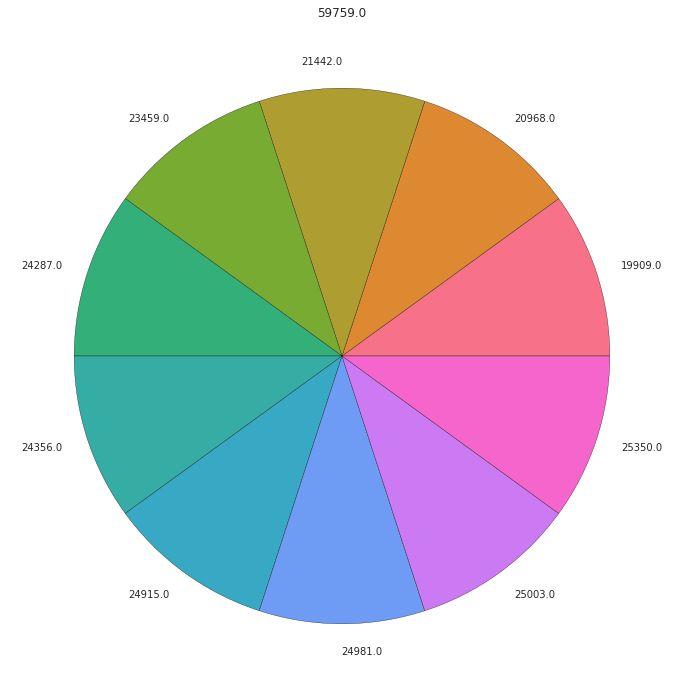

In [40]:
totalcosts = {totalcost:cnt for n_type, totalcost, cnt in counts if n_type==nt}
labels = sorted(totalcosts.keys())
sizes = [totalcosts[key] for key in labels]
pcolors = seaborn.color_palette( "husl",n_colors = len(labels) )
plt.figure(figsize=(12,12))
plt.pie(sizes, labels=labels, colors=pcolors)
plt.title(nt)